In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv("credits.csv")
df2 = pd.read_csv("movies_metadata.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
# Wrangling:
df2["id"] = df2["id"].map(lambda x: x.replace("-",""))

In [36]:
# Convert to int64:
df2["id"] = df2["id"].astype('int64')

In [37]:
# Merge 2 dataframes:
df_merge = df2.merge(df1,on='id')

In [38]:
# convert object to float64
df_merge["popularity"]= df_merge["popularity"].astype('float')

In [39]:
df_merge["popularity"].dtypes

dtype('float64')

In [40]:
# Popular movies:
popular_movies = df_merge.sort_values('popularity',ascending=False)

Text(0.5, 1.0, 'Popular Movies')

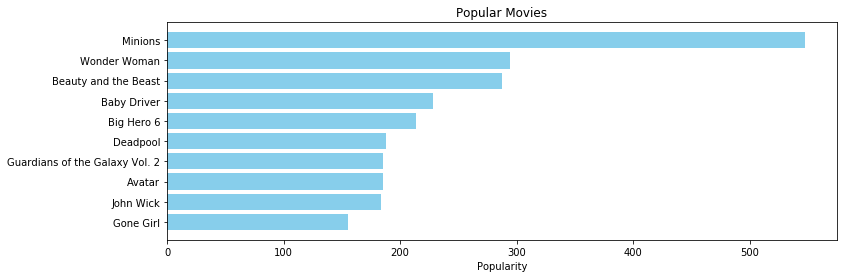

In [41]:
plt.figure(figsize=(12,4))
plt.barh(popular_movies["title"].head(10),popular_movies["popularity"].head(10), align="center", color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [30]:
#TfIdfVectorizer: Convert a collection of raw documents to a matrix of TF-IDF features:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
# Define a TF-IDF Vectorizer Object. 
# Remove all english stop words:
# https://gist.github.com/sebleier/554280
tfidf = TfidfVectorizer(stop_words='english')

In [43]:
df_merge[df_merge["overview"]=='nan']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew


In [44]:
# The above command means that the "overview" column does not have any cell with Nan, which is very good for dataset.
# Otherwise: df_merge["overview"]=df_merge["overview"].fillna("")

In [56]:
X = tfidf.fit_transform(df_merge['overview'].values.astype('U'))
# Create a matrix + convert to Unicode from object
print (tfidf.vocabulary)

None


In [46]:
X.shape

(45538, 75827)

In [47]:
# 75827 different words over 45538 movies in our dataset

In [81]:
print(X[5].sum())

5.42060883685802


In [92]:
def C(a,b=20):
    print(a, b)
    
C(10)

10 20
